## Malaria cell 

## Working with Custom Images 


-----------------
----------------

Mini malaria dataset

This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import imread

In [2]:
data_dir = r'C:\Users\Data\data tensorflow\archive\cell_malaria_datasets'

In [3]:
os.listdir(data_dir)

['Test', 'Train']

In [4]:
train_path = data_dir+'\\Train\\'

In [5]:
test_path = data_dir+'\\Test\\' 

In [6]:
os.listdir(train_path)

['Parasite', 'Uninfected']

In [7]:
os.listdir(test_path)

['Parasite', 'Uninfected']

------
## Visual image

In [8]:
os.listdir(train_path+'\\Parasite')[0]

'C133P94ThinF_IMG_20151004_155721_cell_111.png'

In [9]:
parasite_cell = train_path+'\\Parasite\\'+'C133P94ThinF_IMG_20151004_155721_cell_111.png'

In [10]:
parasite_image = imread(parasite_cell)

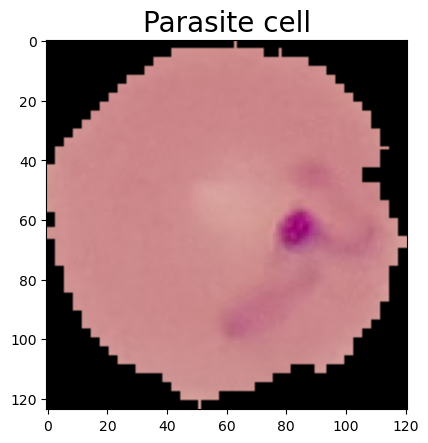

In [11]:
plt.imshow(parasite_image);
plt.title('Parasite cell', size=20);

In [12]:
parasite_image.shape

(124, 121, 3)

-------------
------------

In [13]:
os.listdir(train_path+'\\Uninfected')[0]

'C1_thinF_IMG_20150604_104722_cell_115.png'

In [14]:
uninfected_cell = train_path+'\\Uninfected'+'\\C1_thinF_IMG_20150604_104722_cell_115.png'

In [15]:
uninfected_image = imread(uninfected_cell)

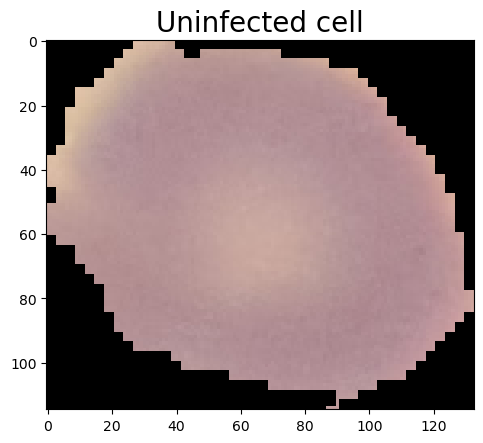

In [16]:
plt.imshow(uninfected_image);
plt.title('Uninfected cell', size=20);

In [17]:
uninfected_image.shape

(115, 133, 3)

-------------
## Nilai rata-rata dimensi pada masing-masin gambar | Test path

In [18]:
dim1 =[]
dim2 =[]

for image_filename in os.listdir(test_path+'\\Uninfected'):
    image = imread(test_path+'\\Uninfected'+'\\'+image_filename)
    d1, d2, color = image.shape
    dim1.append(d1)
    dim2.append(d2)

In [19]:
dim1

[130,
 130,
 112,
 136,
 115,
 121,
 127,
 124,
 124,
 130,
 121,
 133,
 97,
 127,
 112,
 154,
 130,
 145,
 100,
 103,
 106,
 136,
 115,
 121,
 112,
 112,
 127,
 106,
 130,
 115,
 121,
 100,
 124,
 124,
 106,
 115,
 109,
 112,
 142,
 100,
 130,
 115,
 118]

C:\Users\ibrahim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


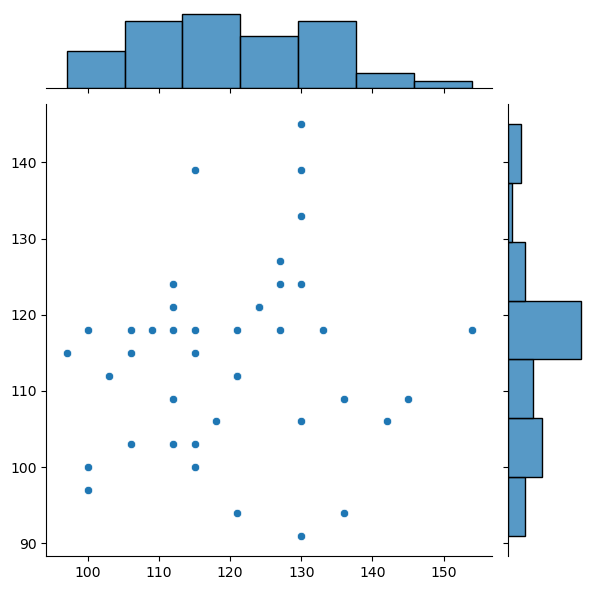

In [20]:
sns.jointplot(dim1, dim2);

In [21]:
np.mean(dim1)

120.16279069767442

In [22]:
np.mean(dim2)

114.72093023255815

In [23]:
image_shape = (114,114,3)

---------
## Manipulation | image data generator

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.src.preprocessing.image:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |  Deprecated: `tf.keras.preprocessing.image.ImageDataGenerator` is not
 |  recommended for new code. Prefer loading images with
 |  `tf.keras.utils.image_dataset_from_directory` and transforming the output
 |  `tf.data.Dataset` with preprocessing layers. For more infor

In [26]:
image_gen = ImageDataGenerator(rotation_range=10, 
                               width_shift_range= 0.20, 
                               height_shift_range = 0.20, 
                               zoom_range = 0.10, 
                               fill_mode='nearest', 
                               rescale= 1/255
                              )

## image before manipulation

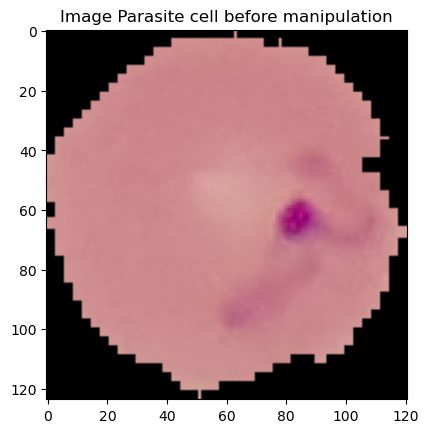

In [27]:
plt.imshow(parasite_image);
plt.title('Image Parasite cell before manipulation');

## Image after manipulation

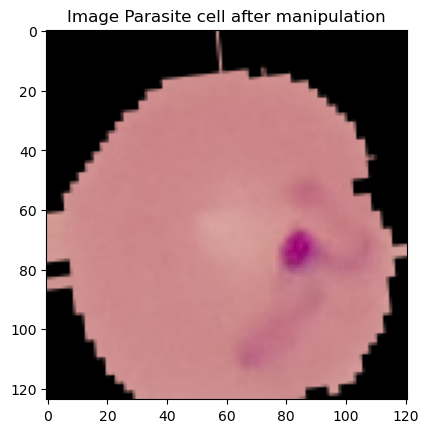

In [28]:
plt.imshow(image_gen.random_transform(parasite_image))
plt.title('Image Parasite cell after manipulation');

<b> jumlah banyaknya gambar

In [29]:
len(os.listdir(train_path+'\\Parasite'))

220

In [30]:
len(os.listdir(train_path+'\\Uninfected'))

196

## Generate seluruh gambar dalam directory

In [31]:
image_gen.flow_from_directory(train_path)

Found 416 images belonging to 2 classes.


In [32]:
image_gen.flow_from_directory(test_path)

Found 134 images belonging to 2 classes.


## Create Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten

In [34]:
model = Sequential()


model.add(Conv2D(filters =32, kernel_size = (3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters =256, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 56, 56, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 54, 54, 256)       73984     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 27, 27, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 256)       590080    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 256)       0

## Add EarlyStopping

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose =1)

------
## Training Model

In [38]:
batch_size = 16

In [39]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2], 
                                                color_mode='rgb',
                                                class_mode= 'binary',
                                                batch_size = batch_size
                                                )

Found 416 images belonging to 2 classes.


In [40]:
test_image_gen = image_gen.flow_from_directory(test_path, 
                                               target_size=image_shape[:2],
                                               color_mode ='rgb',
                                               class_mode='binary',
                                               batch_size=batch_size,
                                               shuffle=False                                             
                                              )

Found 134 images belonging to 2 classes.


In [41]:
len(train_image_gen)

26

In [42]:
len(test_image_gen)

9

In [43]:
train_image_gen.class_indices

{'Parasite': 0, 'Uninfected': 1}

In [44]:
import warnings
warnings.filterwarnings('ignore')

<b> Training Model

In [45]:
model.fit(train_image_gen, 
          epochs= 15,
          validation_data=test_image_gen,
          callbacks =[early_stop], 
          verbose = 1
          )

Epoch 1/15
26/26 [==============================] - 95s 4s/step - loss: 0.8627 - accuracy: 0.5337 - val_loss: 0.6931 - val_accuracy: 0.6791
Epoch 2/15
26/26 [==============================] - 93s 4s/step - loss: 0.6048 - accuracy: 0.6851 - val_loss: 0.6571 - val_accuracy: 0.5970
Epoch 3/15
26/26 [==============================] - 94s 4s/step - loss: 0.4671 - accuracy: 0.8173 - val_loss: 0.5527 - val_accuracy: 0.7388
Epoch 4/15
26/26 [==============================] - 95s 4s/step - loss: 0.4803 - accuracy: 0.8462 - val_loss: 0.3593 - val_accuracy: 0.8582
Epoch 5/15
26/26 [==============================] - 95s 4s/step - loss: 0.3296 - accuracy: 0.9087 - val_loss: 0.7364 - val_accuracy: 0.6194
Epoch 6/15
26/26 [==============================] - 100s 4s/step - loss: 0.2712 - accuracy: 0.8942 - val_loss: 0.4674 - val_accuracy: 0.7537
Epoch 6: early stopping


## Model Metrics and Evaluation

In [46]:
model.metrics_names

['loss', 'accuracy']

In [47]:
model.evaluate(test_image_gen)

9/9 [==============================] - 9s 922ms/step - loss: 0.4326 - accuracy: 0.7836


[0.4325966238975525, 0.7835820913314819]

## Prediction

In [48]:
pred_probilities = model.predict(test_image_gen)

9/9 [==============================] - 10s 1s/step


In [49]:
pred_probilities 

array([[1.6432282e-04],
       [2.9537401e-01],
       [2.0775574e-01],
       [1.7786518e-04],
       [4.8589334e-07],
       [4.1604802e-01],
       [6.0651121e-03],
       [4.9213873e-04],
       [6.4106601e-01],
       [7.5276023e-01],
       [2.9717574e-03],
       [2.1008450e-04],
       [7.0325011e-01],
       [8.3368665e-01],
       [2.7375508e-04],
       [7.8099632e-01],
       [7.8562093e-01],
       [7.6084560e-01],
       [1.9240732e-01],
       [4.6850529e-01],
       [1.4403990e-03],
       [7.9221278e-02],
       [7.8397983e-01],
       [1.4961347e-01],
       [8.0310041e-01],
       [9.4742011e-03],
       [6.9853312e-01],
       [1.5878840e-01],
       [4.4680792e-03],
       [3.3106580e-02],
       [6.6163861e-03],
       [7.0606284e-03],
       [2.8164131e-06],
       [7.2790295e-01],
       [7.4419653e-01],
       [8.1759423e-01],
       [7.9678464e-01],
       [7.2996199e-01],
       [7.5135827e-01],
       [7.5581324e-01],
       [7.9752982e-01],
       [6.253839

In [50]:
prediction = pred_probilities > 0.5

In [51]:
len(prediction)

134

In [52]:
prediction

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [53]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

## Evaluation metrics

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
print(classification_report(test_image_gen.classes, prediction))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79        91
           1       0.57      1.00      0.73        43

    accuracy                           0.76       134
   macro avg       0.79      0.82      0.76       134
weighted avg       0.86      0.76      0.77       134



In [56]:
confusion_matrix(test_image_gen.classes, prediction)

array([[59, 32],
       [ 0, 43]], dtype=int64)

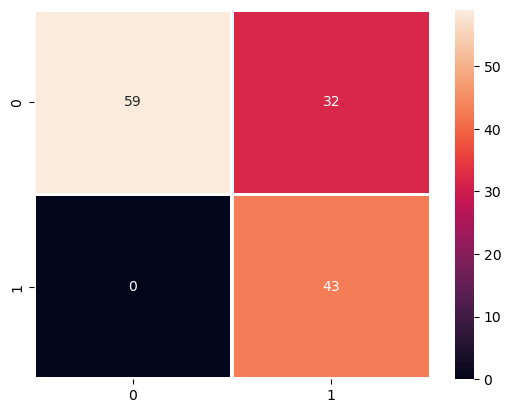

In [57]:
sns.heatmap(confusion_matrix(test_image_gen.classes, prediction), lw=2, annot=True);

## Prediction on images

In [58]:
parasite_cell

'C:\\Users\\Data\\data tensorflow\\archive\\cell_malaria_datasets\\Train\\\\Parasite\\C133P94ThinF_IMG_20151004_155721_cell_111.png'

## load and resize image

In [59]:
from tensorflow.keras.preprocessing import image

In [60]:
#image?

In [61]:
my_image = image.load_img(parasite_cell, target_size = image_shape)

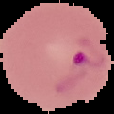

In [62]:
my_image

In [63]:
type(my_image)

PIL.Image.Image

## Convert to array

In [64]:
my_image = image.img_to_array(my_image)

In [65]:
my_image

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [66]:
my_image.shape

(114, 114, 3)

## change dimention
 - image dimention (114, 114, 3)
    - batch size
    - width
    - height
    - color

In [67]:
my_image = np.expand_dims(my_image, axis=0)

In [68]:
my_image.shape

(1, 114, 114, 3)

In [69]:
model.predict(my_image)

1/1 [==============================] - 0s 276ms/step


array([[0.]], dtype=float32)

In [70]:
test_image_gen.class_indices

{'Parasite': 0, 'Uninfected': 1}

## Save Model

In [71]:
from tensorflow.keras.models import load_model

In [72]:
model.save('malaria_detect.h5')

## Kesimpulan
 - prediksi gambar parasite_cell menggunakan model yag telah dibuat dengan tepat menebak gambar kita parasite_cell : 0